# Section 07 - Classfication
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,confusion_matrix, r2_score, roc_curve, auc

### Classification

Classification is the task of approximating a mapping function (f) from input variables (X) to **discrete output variables (y)**. The output variables are often called `labels` or `categories`. A classification problem with two classes is often called binary classification problem. A problem with more than two classes is often called a multi-class classification problem.

For example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“;

### Classification vs Regression 

Recap: Regression is the task of approximating a mapping function (f) from input variables (X) to a **continuous output variable (y)**. A continuous output variable is a real-value, such as an integer or floating point value.

| Classification | Regression |
| --- | --- |
| discrete | countious|
| In Regression, we try to find the best fit line, which can predict the output more accurately. | In Classification, we try to find the decision boundary, which can divide the dataset into different classes.|
| Classification predictions can be evaluated using accuracy, whereas regression predictions cannot.|Regression predictions can be evaluated using mean squared error, whereas classification predictions cannot.

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png alt="image info" style="width: 500px;"/>



### DataSet

Due to spread of COVID-19, vaccine development is being demanded as soon as possible. The dataset we use in this notebook describes the [B-cell](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiDidjy38fzAhX5oHIEHVEOC0IQFnoECAwQAw&url=https%3A%2F%2Fwww.hindawi.com%2Fjournals%2Fjir%2F2017%2F2680160%2F&usg=AOvVaw1qjR4h3uzKaJu1p3eWWYIW) epitope predictions, which is the antigen portion binding to the immunoglobulin or antibody. 


`input_bcell.csv` : this is our main training data. It has 14387 rows and 14 columns.

Columns Interpretions:
* `parent_protein_id`: parent protein ID
* `protein_seq`: parent protein sequence
* `start_position`: start position of peptide
* `end_position`: end position of peptide
* `peptide_seq`: peptide sequence
* `chou_fasman`: peptide feature, β turn
* `emini`: peptide feature, relative surface accessibility
* `kolaskar_tongaonkar`: peptide feature, antigenicity
* `parker`: peptide feature, hydrophobicity
* `isoelectric_point`: protein feature
* `aromacity`: protein feature
* `hydrophobicity`: protein feature
* `stability`: protein feature
* `target`: antibody valence (target value containing 0 and 1)

### Q1 - KNN

***KNN*** calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. Then it selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.
<img src= https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-2.png alt="image info" style="width: 300px;"/>

For instance, we want to classify a new point 'X' belongs to Blue class or Red class. We can use KNN with number of neighbors equal to `3`, where it means finds the `3 nearest points` with least distance to point X. KNN first calcualtes the distance btween X and all other points, then pick 3 nearest points (circled above). Since there are two Red points and one Blue point inside the circle, then we choose Red to be the class of X.

**Read the dataset, create a correlation matrix, split the data with 30% testing, and apply KNN to do classification with number of neighbors equal to 3. What is the prediction accuracy?**

In [3]:
# read table
df = pd.read_csv("input_bcell.csv")
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


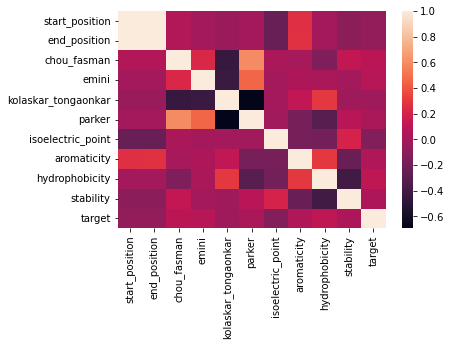

In [6]:
# correlation matrix
sns.heatmap(df.corr())
plt.show()

In [7]:
# prepare training and testing set
X = df.drop(['target', 'parent_protein_id', 'protein_seq', 'peptide_seq'], axis = 1)
y = df['target']
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
# do KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

knn_preds_n3 = knn_model.predict(X_test)
print('The accuracy for KNN(n=3) model prediction is: ', accuracy_score(y_test,knn_preds_n3))

The accuracy for KNN(n=3) model prediction is:  0.7410238591614547


**Try to use different number of neighbors, such as [1,3,4,6,10,30,50] in KNN classifier and plot the prediction accuracy. What can you observe? How to choose number of neighbors in KNN?**

In [12]:
# see different number of neighbors
neighbors = [1,3,4,6,10,30,50]
knn_score_lst = []

for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test,preds)
    mse = mean_squared_error(y_test,preds)
    knn_score_lst.append(accuracy)

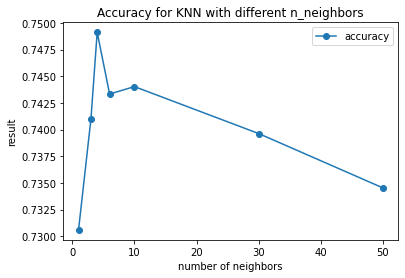

In [13]:
# generate a line graph with above result
plt.plot(neighbors, knn_score_lst, "-o", label = "accuracy")
plt.xlabel('number of neighbors')
# Set the y axis label of the current axis.
plt.ylabel('result')
# Set a title of the current axes.
plt.title('Accuracy for KNN with different n_neighbors')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Observation:

### Q2 - LDA

***LDA*** is a `dimensionality reduction` technique. It reduces the number of dimensions (i.e. variables or dimensions or features) in a dataset while retaining as much information as possible. LDA works by calculating summary statistics for the input features by class label, such as the mean and standard deviation. It uses those information to create a new axis and `projects the data` on to the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.

***Comparing LDA and PCA:***
<img src=https://nirpyresearch.com/wp-content/uploads/2018/11/PCAvsLDA-1024x467.png alt="image info" style="width: 500px;"/>

**Apply LDA to do classification. What is the prediction accuracy?**

In [14]:
# create LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# create LDA model
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
# predict target
LDA_preds = LDA_model.predict(X_test)
# check results
print('The accuracy for LDA model prediction is: ', accuracy_score(y_test,LDA_preds))

The accuracy for LDA model prediction is:  0.7338429464906184


### Q4 - Combine Normalization and PCA with Classification problem

Combine methods we learnt before with this classfication problem. First apply normalization to KNN and LDA models. Then apply both normalization and PCA to those two models. Do Normalization or PCA help increase the accuracy score? Why

In [16]:
# Normalize data 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(X_train_scaled, y_train)
knn_preds_n3_scaled = knn_model_scaled.predict(X_test_scaled)
print('The accuracy for KNN model prediction is: ', accuracy_score(y_test,knn_preds_n3_scaled))

# create LDA model
LDA_model_scaled = LDA()
LDA_model_scaled.fit(X_train_scaled, y_train)
# predict target
LDA_preds_scaled = LDA_model_scaled.predict(X_test_scaled)
# check results
print('The accuracy for LDA model prediction is: ', accuracy_score(y_test,LDA_preds_scaled))

The accuracy for KNN model prediction is:  0.7887421820708825
The accuracy for LDA model prediction is:  0.7338429464906184


In [18]:
# Normalize data and apply PCA
pca = PCA(n_components=5) 
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(pca_train, y_train)
knn_preds_n3_scaled = knn_model_scaled.predict(pca_test)
print('The accuracy for KNN model prediction is: ', accuracy_score(y_test,knn_preds_n3_scaled))

# create LDA model
LDA_model_scaled = LDA()
LDA_model_scaled.fit(pca_train, y_train)
# predict target
LDA_preds_scaled = LDA_model_scaled.predict(pca_test)
# check results
print('The accuracy for LDA model prediction is: ', accuracy_score(y_test,LDA_preds_scaled))

The accuracy for KNN model prediction is:  0.7600185313875376
The accuracy for LDA model prediction is:  0.7317581653926337


**Reference**

document:

https://www.javatpoint.com/regression-vs-classification-in-machine-learning

https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

https://medium.com/machine-learning-algorithms-from-scratch/naive-bayes-classification-from-scratch-in-python-e3a48bf5f91a

data: 

https://future-architect.github.io/articles/20200801/

https://www.kaggle.com/futurecorporation/epitope-prediction?select=input_bcell.csv
